In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import imageio as iio
from pathlib import Path

In [2]:
#Functions to load data
def get_data_from_folder(x):
    images = []
    label=[]
    folder=os.getcwd()

    path=os.path.join(folder,x)
    images = list()
    for file in Path(path).iterdir():
        im = iio.imread(file)

        if str(file).find('happy')!=-1:
            label.append(1)
        else:
            label.append(0)

        images.append(im)
    return images, label


In [3]:
# functions to flatten the data from 101*101 to 1,10201
def flatten_data(images):
    data=[np.array(images[i]).flatten() for i in range(len(images))]
    data=np.array(data)
    return data

In [4]:
#Plot to check where the residual error is diminishing
def residual_error(v):
    plt.style.use('seaborn')
    value_sum=[sum(v[i:-1]).real for i in range(len(v))]
    plt.figure(figsize=(12,7))
    k=[20,40,60,80]
    for i in range(len(k)):
        plt.subplot(2,2,i+1)
        plt.plot(range(len(value_sum[:k[i]])) , value_sum[:k[i]], '*',linestyle='--', color='r')
        plt.title("Residual_Error for k={}".format(k[i]))
    plt.show()
    return

In [5]:
#computing covariance and eigenvalues
def compute_cov(std_data,n,k):
    s=np.dot(std_data.T,std_data)/n
    final_eigen,v=compute_egn(s,k)
    return final_eigen, v
def compute_egn(s,k):
    v,w=np.linalg.eigh(s)
    #sorting the eigen values.
    lex = v.argsort()[::-1]   
    v = v[lex]
    w = w[:,lex]
    w=w.T
    final_eigen=w[:k]
    return final_eigen,v

In [6]:
#seperating the happy class and sad class ;)
def seperate_class_data(data, label):
    class_happy=data[[label[i]==1 for i in range(len(label))]]
    class_sad=data[[label[i]==0 for i in range(len(label))]]
    return class_happy, class_sad
    
    

In [7]:
#computing S_W and S_B
def compute_scatter_matrix(class_happy,happy_mean,k):
    s_w=np.zeros((k,k))
    s_b=np.zeros((k,k))
    happy_mean=class_happy.mean(0)
    sad_mean=class_sad.mean(0)
    s_w+=np.dot((class_happy-happy_mean).T,(class_happy-happy_mean))
    s_w+=np.dot((class_sad-sad_mean).T,(class_sad-sad_mean))
    n_h=class_happy.shape[0]
    n_s=class_sad.shape[0]
    s_b+=n_h*np.dot((happy_mean-total_mean),(happy_mean-total_mean).T)
    s_b+=n_s*np.dot((sad_mean-total_mean),(sad_mean-total_mean).T)
    return s_w,s_b

In [8]:
# Plotting to check the seperation
def Training_plot(final_feature,label):
    final_happy,final_sad=seperate_class_data(final_feature, label)
    n_h=final_happy.shape[0]
    n_s=final_sad.shape[0]
    plt.figure()
    plt.scatter(range(n_h),final_happy,marker='*',color='#1f77b4')
    plt.scatter(range(n_s),final_sad,marker='o',color='#ff7f0e')
    plt.show()
    return

In [19]:
#function to count accuracy
def accuracy_count(feature,label,threshold):
    
    count=0
    for i in range(len(feature)):
        if feature[i]>-threshold and label[i]==1:
            count+=1
            
        elif feature[i]<-threshold and label[i]==0:
            count+=1
        else:
            continue
            
    return count

In [10]:
x='Data/emotion_classification/train'
images, label=get_data_from_folder(x)
n=len(images)
data=flatten_data(images)
mean_data=data.mean(0)
std_data=data-mean_data

k=19
final_eigen, v=compute_cov(std_data,n,k)



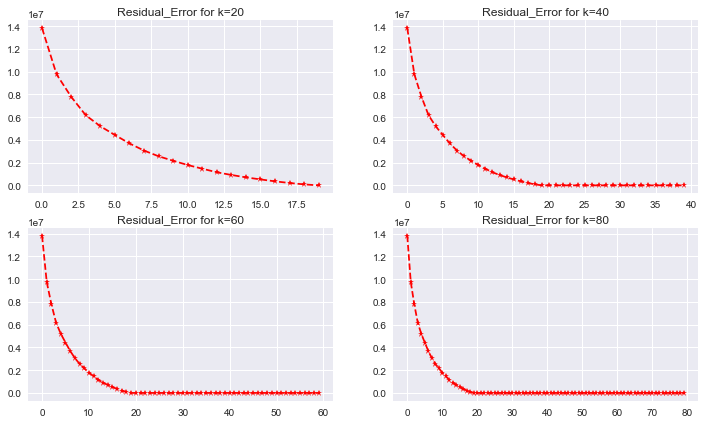

In [11]:
residual_error(v)
pca=(np.dot(final_eigen,std_data.T).T).real
total_mean=pca.mean(0)
class_happy, class_sad=seperate_class_data(pca, label)
s_w,s_b=compute_scatter_matrix(class_happy,class_sad,k)
M=np.dot(np.linalg.inv(s_w),s_b)


In [36]:
final_w , v_new =compute_egn(M,1)
final_feature=(np.dot(final_w,pca.T).T).real


In [18]:
final_feature

array([[-656.35160563],
       [-656.35160563],
       [ 537.01495006],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006],
       [-656.35160563],
       [ 537.01495006]])

In [13]:
count=accuracy_count(final_feature,label)
size=len(label)
Train_accuracy=((size-count)/size)*100
Train_accuracy

100.0

In [14]:
y='Data/emotion_classification/test'
test_images, test_label=get_data_from_folder(y)
test_data=flatten_data(test_images)
test_data=test_data-mean_data
test_pca=(np.dot(final_eigen,test_data.T).T).real
final_test_feature=(np.dot(final_w,test_pca.T).T).real



In [39]:
threshold=100
#np.sum(final_feature)/n
count=accuracy_count(final_test_feature,test_label,threshold)
size=len(test_label)
accuracy=((size-count)/size)*100



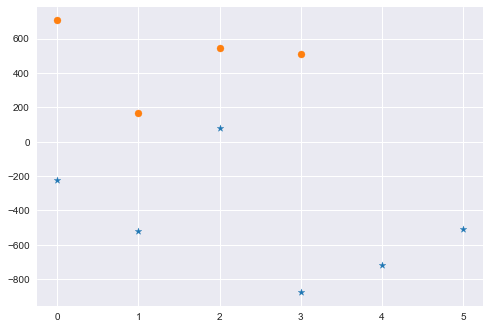

The optimum k value is:  19
The accuracy value is:  90.0
The threshold value is -3.410605131648481e-14


In [38]:
Training_plot(final_test_feature, test_label)
print("The optimum k value is: ", k)  
print("The accuracy value is: ", accuracy)
print("The threshold value is", threshold)
    
            
            

-3.410605131648481e-14